In [1]:
%% Machine Learning Online Class - Exercise 3 | Part 1: One-vs-all

%  Instructions
%  ------------
%
%  This file contains code that helps you get started on the
%  linear exercise. You will need to complete the following functions
%  in this exericse:
%
%     lrCostFunction.m (logistic regression cost function)
%     oneVsAll.m
%     predictOneVsAll.m
%     predict.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

In [2]:
%% Initialization
clear ; close all; clc

In [3]:
%% Setup the parameters you will use for this part of the exercise
input_layer_size  = 400;  % 20x20 Input Images of Digits
num_labels = 10;          % 10 labels, from 1 to 10
                          % (note that we have mapped "0" to label 10)

Loading and Visualizing Data ...


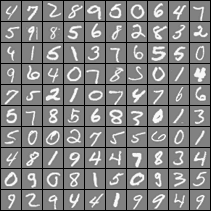

In [4]:
%% =========== Part 1: Loading and Visualizing Data =============
%  We start the exercise by first loading and visualizing the dataset.
%  You will be working with a dataset that contains handwritten digits.
%

% Load Training Data
fprintf('Loading and Visualizing Data ...\n')

load('ex3data1.mat'); % training data stored in arrays X, y
m = size(X, 1);

% Randomly select 100 data points to display
rand_indices = randperm(m);
sel = X(rand_indices(1:100), :);

displayData(sel);

In [5]:
%% ============ Part 2a: Vectorize Logistic Regression ============
%  In this part of the exercise, you will reuse your logistic regression
%  code from the last exercise. You task here is to make sure that your
%  regularized logistic regression implementation is vectorized. After
%  that, you will implement one-vs-all classification for the handwritten
%  digit dataset.
%

% Test case for lrCostFunction
fprintf('\nTesting lrCostFunction() with regularization');

theta_t = [-2; -1; 1; 2];
X_t = [ones(5,1) reshape(1:15,5,3)/10];
y_t = ([1;0;1;0;1] >= 0.5);
lambda_t = 3;
[J grad] = lrCostFunction(theta_t, X_t, y_t, lambda_t);

fprintf('\nCost: %f\n', J);
fprintf('Expected cost: 2.534819\n');
fprintf('Gradients:\n');
fprintf(' %f \n', grad);
fprintf('Expected gradients:\n');
fprintf(' 0.146561\n -0.548558\n 0.724722\n 1.398003\n');


Testing lrCostFunction() with regularization

Cost: 2.534819
Expected cost: 2.534819
Gradients:
 0.146561 
 -0.548558 
 0.724722 
 1.398003 
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003
Testing lrCostFunction() with regularization


In [6]:
%% ============ Part 2b: One-vs-All Training ============
fprintf('\nTraining One-vs-All Logistic Regression...\n')

lambda = 0.1;
[all_theta] = oneVsAll(X, y, num_labels, lambda);


Training One-vs-All Logistic Regression...
Iteration    50 | Cost: 1.386407e-02
Iteration    50 | Cost: 5.725254e-02
Iteration    50 | Cost: 6.327941e-02
Iteration    50 | Cost: 3.698636e-02
Iteration    50 | Cost: 6.143059e-02
Iteration    50 | Cost: 2.173162e-02
Iteration    50 | Cost: 3.639606e-02
Iteration    50 | Cost: 8.463652e-02
Iteration    50 | Cost: 7.958780e-02
Iteration    50 | Cost: 9.520109e-03


In [7]:
%% ================ Part 3: Predict for One-Vs-All ================

pred = predictOneVsAll(all_theta, X);

fprintf('\nTraining Set Accuracy: %f\n', mean(double(pred == y)) * 100);


Training Set Accuracy: 95.080000


In [8]:
%% Machine Learning Online Class - Exercise 3 | Part 2: Neural Networks

%  Instructions
%  ------------
% 
%  This file contains code that helps you get started on the
%  linear exercise. You will need to complete the following functions 
%  in this exericse:
%
%     lrCostFunction.m (logistic regression cost function)
%     oneVsAll.m
%     predictOneVsAll.m
%     predict.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

In [9]:
%% Initialization
clear ; close all; clc

In [10]:
%% Setup the parameters you will use for this exercise
input_layer_size  = 400;  % 20x20 Input Images of Digits
hidden_layer_size = 25;   % 25 hidden units
num_labels = 10;          % 10 labels, from 1 to 10   
                          % (note that we have mapped "0" to label 10)

Loading and Visualizing Data ...


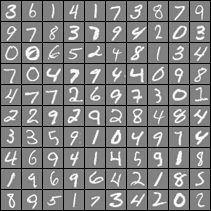

In [11]:
%% =========== Part 1: Loading and Visualizing Data =============
%  We start the exercise by first loading and visualizing the dataset. 
%  You will be working with a dataset that contains handwritten digits.
%

% Load Training Data
fprintf('Loading and Visualizing Data ...\n')

load('ex3data1.mat');
m = size(X, 1);

% Randomly select 100 data points to display
sel = randperm(size(X, 1));
sel = sel(1:100);

displayData(X(sel, :));

In [12]:
%% ================ Part 2: Loading Pameters ================
% In this part of the exercise, we load some pre-initialized 
% neural network parameters.

fprintf('\nLoading Saved Neural Network Parameters ...\n')

% Load the weights into variables Theta1 and Theta2
load('ex3weights.mat');

%% ================= Part 3: Implement Predict =================
%  After training the neural network, we would like to use it to predict
%  the labels. You will now implement the "predict" function to use the
%  neural network to predict the labels of the training set. This lets
%  you compute the training set accuracy.

pred = predict(Theta1, Theta2, X);

fprintf('\nTraining Set Accuracy: %f\n', mean(double(pred == y)) * 100);


Loading Saved Neural Network Parameters ...

Training Set Accuracy: 97.520000



Displaying Example Image

Neural Network Prediction: 8 (digit 8)

Displaying Example Image

Neural Network Prediction: 3 (digit 3)

Displaying Example Image

Neural Network Prediction: 4 (digit 4)

Displaying Example Image

Neural Network Prediction: 6 (digit 6)

Displaying Example Image

Neural Network Prediction: 7 (digit 7)


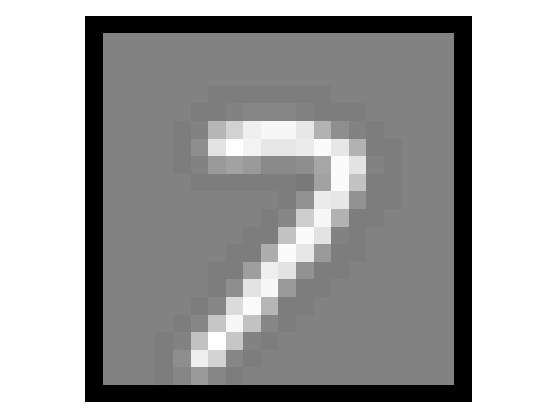

In [13]:
%  To give you an idea of the network's output, you can also run
%  through the examples one at the a time to see what it is predicting.

%  Randomly permute examples
rp = randperm(m);

for i = 1:5
    % Display 
    fprintf('\nDisplaying Example Image\n');
    displayData(X(rp(i), :));

    pred = predict(Theta1, Theta2, X(rp(i),:));
    fprintf('\nNeural Network Prediction: %d (digit %d)\n', pred, mod(pred, 10));
    
    % Pause with quit option
    %s = input('Paused - press enter to continue, q to exit:','s');
    %if s == 'q'
    %  break
    %end
end

In [14]:
submit

== Submitting solutions | Multi-class Classification and Neural Networks...
Iteration    28 | Cost: 3.391340e-01
Iteration    25 | Cost: 6.631438e-02
Iteration    31 | Cost: 1.002636e-01
Iteration    20 | Cost: 3.598119e-01
== 
==                                   Part Name |     Score | Feedback
==                                   --------- |     ----- | --------
==             Regularized Logistic Regression |  30 /  30 | Nice work!
==              One-vs-All Classifier Training |  20 /  20 | Nice work!
==            One-vs-All Classifier Prediction |  20 /  20 | Nice work!
==          Neural Network Prediction Function |  30 /  30 | Nice work!
==                                   --------------------------------
==                                             | 100 / 100 | 
== 
